# Pole-Building Assignment

**Jupyter Notebook Created by**:
   - Kooshan Amini, Ph.D. Student at Rice University (Kooshan.Amini@rice.edu)
   - Mehrzad Rahimi, Postdoctoral fellow at Rice University (mr77@rice.edu)

## 1) Initialization

In [280]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import geopandas as gpd
import numpy as np
import sys 
import os
import json
import matplotlib.pyplot as plt
from pyincore import IncoreClient, Dataset, DataService, HazardService, FragilityService, MappingSet, FragilityCurveSet


In [281]:
# Check package versions - good practice for replication
print("Python Version ", sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:41:22) [MSC v.1929 64 bit (AMD64)]
pandas version:  1.5.2
numpy version:  1.24.1


In [282]:
# Check working directory - good practice for relative path access
os.getcwd()

'C:\\Users\\Kooshan\\Box\\Rice\\Software_Projects\\Pycharm\\IN-CORE_Galveston\\jupyter_book\\notebooks\\03_AdditionalNotebooks\\Nearest neighbor analysis_Poles and Buildings'

In [283]:
client = IncoreClient()
# IN-CORE caches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 
data_service = DataService(client) # create data_service object for loading files
hazard_service = HazardService(client)
fragility_service = FragilityService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.8.0


In [284]:
path_to_output = os.path.join(os.getcwd(), 'output',)
if not os.path.exists(path_to_output):
    os.makedirs(path_to_output)

## 2) Getting needed data

In [285]:
# Buildings geopandas
bldg_dataset_id = "60354b6c123b4036e6837ef7"                    # defining building dataset (GIS point layer)       
bldg_dataset = Dataset.from_data_service(bldg_dataset_id, data_service)
bldg_df = bldg_dataset.get_dataframe_from_shapefile()
bldg_df.rename(columns={"guid": "bldg_guid"}, inplace=True)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


In [286]:
# Poles geopandas
galv_elec_id = "62fc000f88470b319561b58d"
galv_elec = Dataset.from_data_service(galv_elec_id, data_service)
galv_elec_df = galv_elec.get_dataframe_from_shapefile()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


Here, first the poles and substations have became seperated and then been plotted:

In [287]:
galv_elec_df

,nodenwid,epf_class,height,utilfcltyc,spanLength,fltytype,strctype,flow,guid,geometry
0,709,None,NaN,2,54.051965,None,None,None,2525e200-cdc6-4fb8-9952-f17579176fd8,POINT (-94.81283 29.29671)
1,724,None,NaN,2,21.865475,None,None,None,9180f947-26ae-40bd-85f5-83a80525f6c8,POINT (-94.81676 29.29552)
2,725,None,NaN,2,59.525048,None,None,None,11ddc2dc-cc92-4c90-b4cc-a99b92a26f4b,POINT (-94.81683 29.29565)
3,1691,None,NaN,2,23.753117,None,None,None,9e58f196-9a2c-40b1-b722-69fa9c53c9d4,POINT (-94.79776 29.30243)
4,1692,None,NaN,2,24.739579,None,None,None,a4de2d54-b251-4a02-af0c-d12e0dc3670c,POINT (-94.79780 29.30256)
...,...,...,...,...,...,...,...,...,...,...
16032,16031,3,40.0,1,26.799330,None,None,None,2c896ae9-021c-4dd9-af73-7b7d88442801,POINT (-94.79436 29.30382)
16033,16032,3,40.0,1,0.000000,None,None,None,714fd53b-9020-426f-bece-f090d2682f64,POINT (-94.79268 29.30425)
16034,16033,3,40.0,1,48.127953,None,None,None,eaf8101b-9fc1-4c31-b0f8-d4c0cd01f01a,POINT (-94.79253 29.30430)
16035,16034,3,40.0,1,62.098186,None,None,None,0d5d027a-64ad-4321-9754-5adb954ff408,POINT (-94.79207 29.30442)


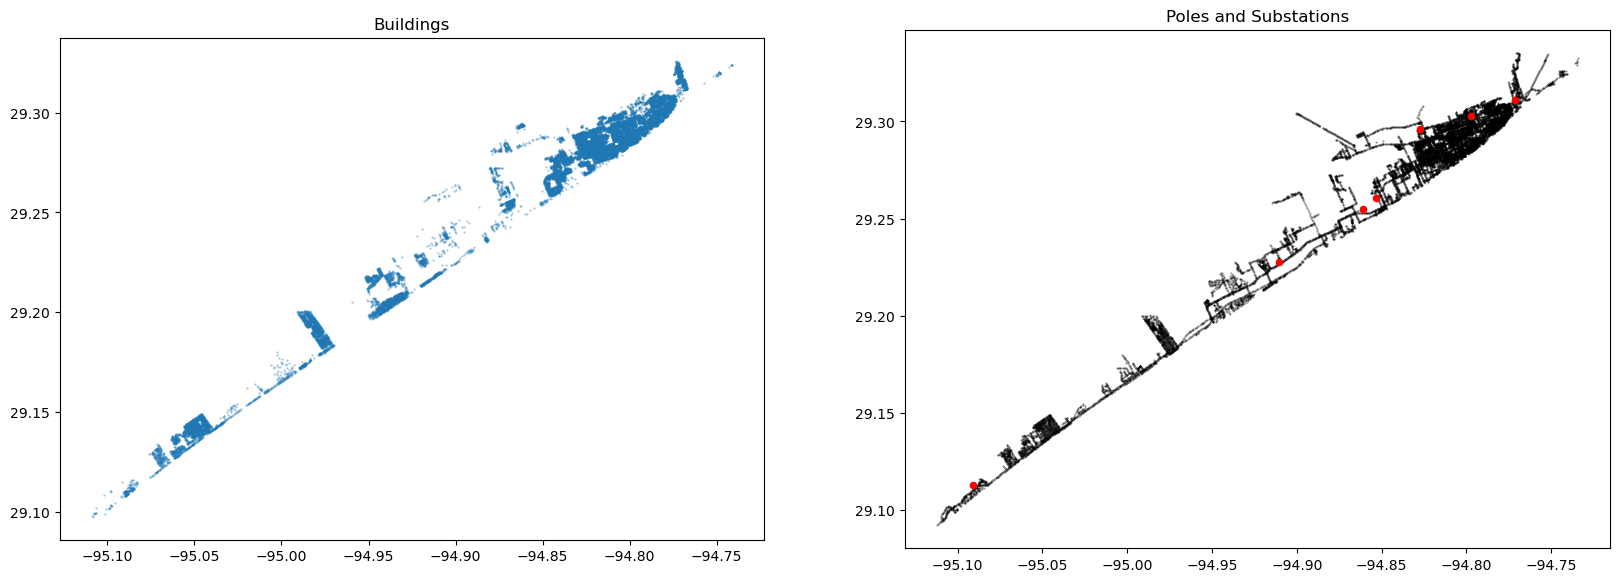

In [288]:
poles_df = galv_elec_df[(galv_elec_df['utilfcltyc'] == '1') | (galv_elec_df['utilfcltyc'] == '2')]
poles_df.rename(columns={"guid": "poles_guid"}, inplace=True)
substations_df = galv_elec_df[galv_elec_df['utilfcltyc'] == '20']
substations_df.rename(columns={"guid": "substations_guid"}, inplace=True)


fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(20,12.5))

# Plot buildings
bldg_df.plot(ax=axes[0],markersize=0.2, alpha=0.5)
axes[0].set_title('Buildings')

# Plot Poles
poles_df.plot(ax=axes[1], markersize=0.2, alpha=0.5, color='black')

# Plot Substations
substations_df.plot(ax=axes[1], markersize=20, color='red')
axes[1].set_title('Poles and Substations');

In [289]:
poles_df

,nodenwid,epf_class,height,utilfcltyc,spanLength,fltytype,strctype,flow,poles_guid,geometry
0,709,None,NaN,2,54.051965,None,None,None,2525e200-cdc6-4fb8-9952-f17579176fd8,POINT (-94.81283 29.29671)
1,724,None,NaN,2,21.865475,None,None,None,9180f947-26ae-40bd-85f5-83a80525f6c8,POINT (-94.81676 29.29552)
2,725,None,NaN,2,59.525048,None,None,None,11ddc2dc-cc92-4c90-b4cc-a99b92a26f4b,POINT (-94.81683 29.29565)
3,1691,None,NaN,2,23.753117,None,None,None,9e58f196-9a2c-40b1-b722-69fa9c53c9d4,POINT (-94.79776 29.30243)
4,1692,None,NaN,2,24.739579,None,None,None,a4de2d54-b251-4a02-af0c-d12e0dc3670c,POINT (-94.79780 29.30256)
...,...,...,...,...,...,...,...,...,...,...
16032,16031,3,40.0,1,26.799330,None,None,None,2c896ae9-021c-4dd9-af73-7b7d88442801,POINT (-94.79436 29.30382)
16033,16032,3,40.0,1,0.000000,None,None,None,714fd53b-9020-426f-bece-f090d2682f64,POINT (-94.79268 29.30425)
16034,16033,3,40.0,1,48.127953,None,None,None,eaf8101b-9fc1-4c31-b0f8-d4c0cd01f01a,POINT (-94.79253 29.30430)
16035,16034,3,40.0,1,62.098186,None,None,None,0d5d027a-64ad-4321-9754-5adb954ff408,POINT (-94.79207 29.30442)


In [290]:
substations_df

,nodenwid,epf_class,height,utilfcltyc,spanLength,fltytype,strctype,flow,substations_guid,geometry
268,1,None,NaN,20,299.385944,None,None,None,9c1bc010-5619-46a8-8a26-be15cdcbe07f,POINT (-94.82755 29.29617)
269,2,None,NaN,20,179.501088,None,None,None,c2a2fab8-9055-40ef-89a6-d7cce824a1b0,POINT (-94.85338 29.26065)
270,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
271,4,None,NaN,20,97.567523,None,None,None,f3d89f4c-b1ee-40b2-9afb-75e939016ee7,POINT (-95.09075 29.11266)
272,5,None,NaN,20,76.204443,None,None,None,fcee466c-0554-4f76-a6a4-a6431d563dee,POINT (-94.79729 29.30298)
273,6,None,NaN,20,21.078656,None,None,None,92f02a57-7c92-4dbe-a449-2054f939676c,POINT (-94.77146 29.31085)
275,8,None,NaN,20,94.679718,None,None,None,03981b49-9f97-4cc9-85d7-6f5dde50695b,POINT (-94.86118 29.25516)


## 3) Poles-substations-building matching

we can see from the coordinates and the map that both of the layers share the same coordinate reference system. Hence, we are ready to find closest pole (on the right) for each building on the left map. Let’s first prepare a couple of functions that does the work

In [291]:
from sklearn.neighbors import BallTree

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)

def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.

    NOTICE: Assumes that the input Points are in WGS84 projection (lat/lon).
    """

    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name

    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)

    # Parse coordinates from points and insert them into a numpy array as RADIANS
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())

    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)

    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]

    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)

    # Add distance if requested
    if return_dist:
        # Convert to meters from radians
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius

    return closest_points

Okay, now we have our functions defined. So let’s use them and find the nearest neighbors!

In [292]:
# Find closest pole and substation for each building and get also the distance based on haversine distance
# Note: haversine distance which is implemented here is a bit slower than using e.g. 'euclidean' metric
# but useful as we get the distance between points in meters
closest_poles = nearest_neighbor(bldg_df, poles_df, return_dist=True)
closest_substations = nearest_neighbor(bldg_df, substations_df, return_dist=True)

In [293]:
closest_poles

,nodenwid,epf_class,height,utilfcltyc,spanLength,fltytype,strctype,flow,poles_guid,geometry,distance
0,81,5,20.0,1,44.339908,None,None,None,ae93ce18-9d11-45a8-bd69-bba2ebc0f0ce,POINT (-94.92095 29.22751),12.972083
1,83,5,20.0,1,12.173564,None,None,None,fa601b28-94b2-45f6-b95f-cc254835cf93,POINT (-94.92073 29.22781),8.944374
2,93,5,20.0,1,31.155735,None,None,None,7f471cbc-1e8b-4c59-aba2-001432124595,POINT (-94.92113 29.22852),9.022716
3,80,5,20.0,1,65.903857,None,None,None,0ebc665b-d095-4c24-be3b-e0320fd1011a,POINT (-94.92143 29.22722),8.771394
4,80,5,20.0,1,65.903857,None,None,None,0ebc665b-d095-4c24-be3b-e0320fd1011a,POINT (-94.92143 29.22722),4.127933
...,...,...,...,...,...,...,...,...,...,...,...
18957,115,5,20.0,1,59.423983,None,None,None,1d909da2-de36-4752-a26e-555f8aa70ecc,POINT (-94.92317 29.22894),8.052183
18958,94,5,20.0,1,76.323221,None,None,None,1470c7f1-9444-4356-ac12-ea88b166ca25,POINT (-94.92303 29.22803),15.670623
18959,114,5,20.0,1,79.698817,None,None,None,0811043d-6975-45de-8485-13b5fc86d201,POINT (-94.92267 29.22913),11.465839
18960,76,5,20.0,1,27.425693,None,None,None,e34ddcd5-6113-49f5-acc6-8a71afa9dd9b,POINT (-94.92232 29.22667),16.658708


In [294]:
closest_substations

,nodenwid,epf_class,height,utilfcltyc,spanLength,fltytype,strctype,flow,substations_guid,geometry,distance
0,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1164.185182
1,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1135.279032
2,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1169.707088
3,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1206.401535
4,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1214.180261
...,...,...,...,...,...,...,...,...,...,...,...
18957,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1403.218901
18958,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1373.199646
18959,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1339.846677
18960,3,None,NaN,20,34.217744,None,None,None,655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762),1310.941029


## 4) Exporting results

In [295]:
df_final = pd.merge(bldg_df[["bldg_guid","geometry"]], closest_poles[["poles_guid","geometry"]], left_index=True, right_index=True)
df_final = pd.merge(df_final, closest_substations[["substations_guid","geometry"]], left_index=True, right_index=True)

In [296]:
df_final

,bldg_guid,geometry_x,poles_guid,geometry_y,substations_guid,geometry
0,b39dd67f-802e-402b-b7d5-51c4bbed3464,POINT (-94.92101 29.22867),ae93ce18-9d11-45a8-bd69-bba2ebc0f0ce,POINT (-94.92095 29.22751),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
1,e7467617-6844-437e-a938-7300418facb8,POINT (-94.92075 29.22871),fa601b28-94b2-45f6-b95f-cc254835cf93,POINT (-94.92073 29.22781),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
2,d7ce12df-660d-42fc-9786-f0f543c00002,POINT (-94.92106 29.22799),7f471cbc-1e8b-4c59-aba2-001432124595,POINT (-94.92113 29.22852),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
3,74aac543-8aae-4779-addf-754e307a772b,POINT (-94.92139 29.22800),0ebc665b-d095-4c24-be3b-e0320fd1011a,POINT (-94.92143 29.22722),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
4,ed3147d3-b7b8-49da-96a9-ddedfccae60c,POINT (-94.92146 29.22749),0ebc665b-d095-4c24-be3b-e0320fd1011a,POINT (-94.92143 29.22722),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
...,...,...,...,...,...,...
18957,b33b8857-892e-42bb-93c9-4a025fc59d69,POINT (-94.92316 29.22811),1d909da2-de36-4752-a26e-555f8aa70ecc,POINT (-94.92317 29.22894),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
18958,902f2d0e-5676-4a9d-9873-168dea6b6224,POINT (-94.92289 29.22820),1470c7f1-9444-4356-ac12-ea88b166ca25,POINT (-94.92303 29.22803),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
18959,6e1cb252-d668-408b-95a5-c00707ed533b,POINT (-94.92259 29.22832),0811043d-6975-45de-8485-13b5fc86d201,POINT (-94.92267 29.22913),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)
18960,d0a45723-a0a3-4be2-87cb-373c7fdc363f,POINT (-94.92233 29.22841),e34ddcd5-6113-49f5-acc6-8a71afa9dd9b,POINT (-94.92232 29.22667),655ae679-a718-4895-b29d-65acf441e3bf,POINT (-94.91054 29.22762)


In [297]:
result_name = os.path.join(path_to_output, 'closest_poles_to_bldgs')

In [298]:
df_final.to_csv(result_name+'.csv')

Making JSON file:

In [299]:
df_nested = df_final[["bldg_guid","poles_guid","substations_guid"]]
df_nested

,bldg_guid,poles_guid,substations_guid
0,b39dd67f-802e-402b-b7d5-51c4bbed3464,ae93ce18-9d11-45a8-bd69-bba2ebc0f0ce,655ae679-a718-4895-b29d-65acf441e3bf
1,e7467617-6844-437e-a938-7300418facb8,fa601b28-94b2-45f6-b95f-cc254835cf93,655ae679-a718-4895-b29d-65acf441e3bf
2,d7ce12df-660d-42fc-9786-f0f543c00002,7f471cbc-1e8b-4c59-aba2-001432124595,655ae679-a718-4895-b29d-65acf441e3bf
3,74aac543-8aae-4779-addf-754e307a772b,0ebc665b-d095-4c24-be3b-e0320fd1011a,655ae679-a718-4895-b29d-65acf441e3bf
4,ed3147d3-b7b8-49da-96a9-ddedfccae60c,0ebc665b-d095-4c24-be3b-e0320fd1011a,655ae679-a718-4895-b29d-65acf441e3bf
...,...,...,...
18957,b33b8857-892e-42bb-93c9-4a025fc59d69,1d909da2-de36-4752-a26e-555f8aa70ecc,655ae679-a718-4895-b29d-65acf441e3bf
18958,902f2d0e-5676-4a9d-9873-168dea6b6224,1470c7f1-9444-4356-ac12-ea88b166ca25,655ae679-a718-4895-b29d-65acf441e3bf
18959,6e1cb252-d668-408b-95a5-c00707ed533b,0811043d-6975-45de-8485-13b5fc86d201,655ae679-a718-4895-b29d-65acf441e3bf
18960,d0a45723-a0a3-4be2-87cb-373c7fdc363f,e34ddcd5-6113-49f5-acc6-8a71afa9dd9b,655ae679-a718-4895-b29d-65acf441e3bf


In [300]:
j = (df_nested.groupby('bldg_guid')
       .apply(lambda x: x[['poles_guid','substations_guid']].to_dict('record'))
       .to_json(orient='index'))
parsed = json.loads(j)
final = json.dumps(parsed, indent=4)
with open(result_name+".json", "w") as outfile:
    outfile.write(final)